In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-


# Deep Neural Networks

## Session 08a - Activation Functions


<img src='../../images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

In [2]:
# Lets import some libraries
import os

import numpy as np

import pandas as pd

from scipy.misc import derivative

import matplotlib.pyplot as plt

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter,
                               AutoMinorLocator)

%matplotlib inline

In [3]:
# Some basic parameters
inpDir = '../input'
outDir = '../output'

RANDOM_STATE = 24

np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 7),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

CMAP = plt.cm.Blues

plt.rcParams.update(params)

## Fabricate Data

In [4]:
# create x data points
x_min = -5
x_max = 5
step = 0.01
x_range = np.arange(x_min, x_max, step) # create an array in the rage

In [5]:
data_df = pd.DataFrame(x_range, columns = ['x'], dtype = np.float64)#.round(4)
data_df.head()

,x
0,-5.00
1,-4.99
2,-4.98
3,-4.97
4,-4.96


## Helper Functions

In [6]:
# Function for plotting

def fn_plot_activation(axes, df, c1, c2, yMajLoc = 1, yMinLoc = 0.2):
    
    '''
    Args:
        axes : need two axes to plot function and its prime
        df : dataframe having values
        c1, c2: str column names to plot
        yMajLoc = 1, yMinLoc = 0.2 : Major and minor ticks spacing on y axis
    
    '''
    

    # for plotting of function
    ax = axes[0]
    
    # plot column 1 (function it self) 
    df.plot(x = 'x', y = c1, ax = ax, c = 'b', rot = 90, lw=3)
    
    ax.set_xlabel ('Input')
    
    # horizontal lines for axis marking
    ax.axhline(0, c = 'k', lw = 2)
    ax.axvline(0, c = 'k', lw=2)

    # show only major grid
    ax.grid(which='major', axis='both')
    
    # set major axis and format display of labels
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%3.1f'))

    # For the minor ticks, use no labels; default NullFormatter
    ax.xaxis.set_minor_locator(MultipleLocator(0.2))

    # set major axis and format display of labels
    ax.yaxis.set_major_locator(MultipleLocator(yMajLoc))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%3.1f'))

    # For the minor ticks, use no labels; default NullFormatter.
    ax.yaxis.set_minor_locator(MultipleLocator(yMinLoc))
    
    # Now using second axis for plotting derivative
    ax = axes[1]
    df.plot(x = 'x', y = c2, ax = ax, c = 'b', rot = 90, lw=3)
    
    ax.set_xlabel ('Input')
    
    # horizontal lines for axis marking
    ax.axhline(0, c = 'k', lw = 2)
    ax.axvline(0, c = 'k', lw = 2)

    # show only major grid
    ax.grid(which='major', axis='both')
    
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%3.1f'))

    # For the minor ticks, use no labels; default NullFormatter.
    ax.xaxis.set_minor_locator(MultipleLocator(0.2))

    ax.yaxis.set_major_locator(MultipleLocator(yMajLoc))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%3.1f'))

    # For the minor ticks, use no labels; default NullFormatter.
    ax.yaxis.set_minor_locator(MultipleLocator(yMinLoc))
    

# Function to mark equation on the image
def fn_plot_equation(ax, x , y, text):
    '''
        ax : axis 
        x  : Horizontal position
        y  : Vertical position
        text : text to plot
    '''
    
    ax.text(x, y, text, {'color': 'k',
                         'fontsize': 'xx-large',
                         'verticalalignment' : 'top',
                         'horizontalalignment' : 'left',
                         #'fontweight' :'bold',
                         'style' : 'italic'},
            
            bbox={'facecolor': 'cyan',
                  'alpha': 0.3,
                  'pad': 5 })

## Linear Function

Linear function is some multiple of the values

In [7]:
def linear (z,m ) :
    '''
        z : values comming from agregator
        m: multipier
    '''
    return m*z

# Derivative of the function
def linear_prime (z,m ) :
    
    return m

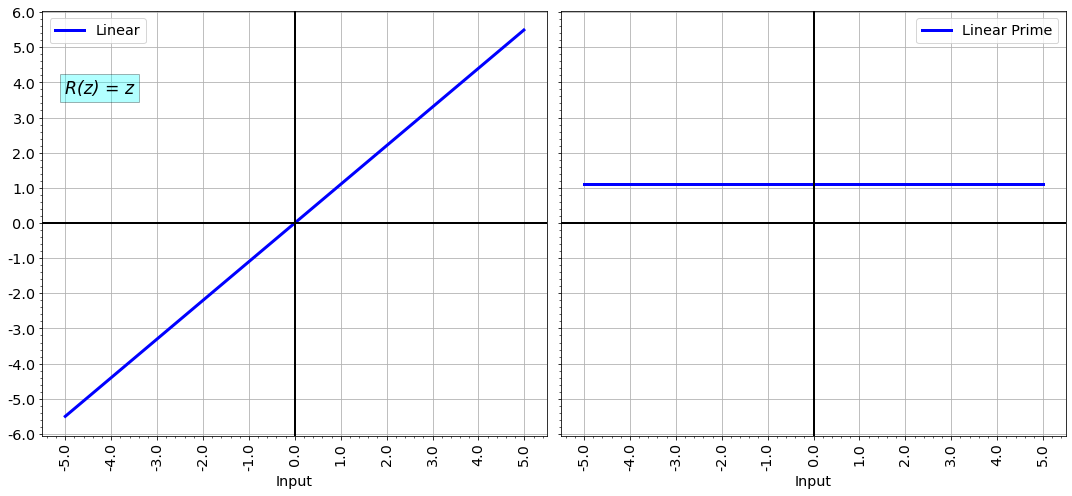

In [8]:
m = 1.1

# select columns to plot
col1 = 'Linear'
col2 = 'Linear Prime'

# add two columns in the dataframe for function values and its prime
data_df[col1] = data_df['x'].apply(lambda x: linear (x,m ))
data_df[col2] = data_df['x'].apply(lambda x: linear_prime (x,m ))

# create figure and its axis objects
fig, axes = plt.subplots(1, 2, sharey=True)



# calling function to plot the columns
fn_plot_activation(axes, data_df, col1, col2)

# mark text on axis 
ax =axes[0]
eq = r'R(z) = z'

xLoc = -5
yLoc = 4.1

fn_plot_equation(ax, xLoc , yLoc, eq)

plt.tight_layout()

# save figures to update the presentations
plt.savefig(os.path.join(outDir, '{}.png'.format(col1.lower())))

## Sigmoid

The sigmoid function, also called the sigmoidal curve (von Seggern 2007, p. 148) or logistic function, is the s shaped function represented by:

R(z) = $\frac{1}{1 + e^{-z}}$

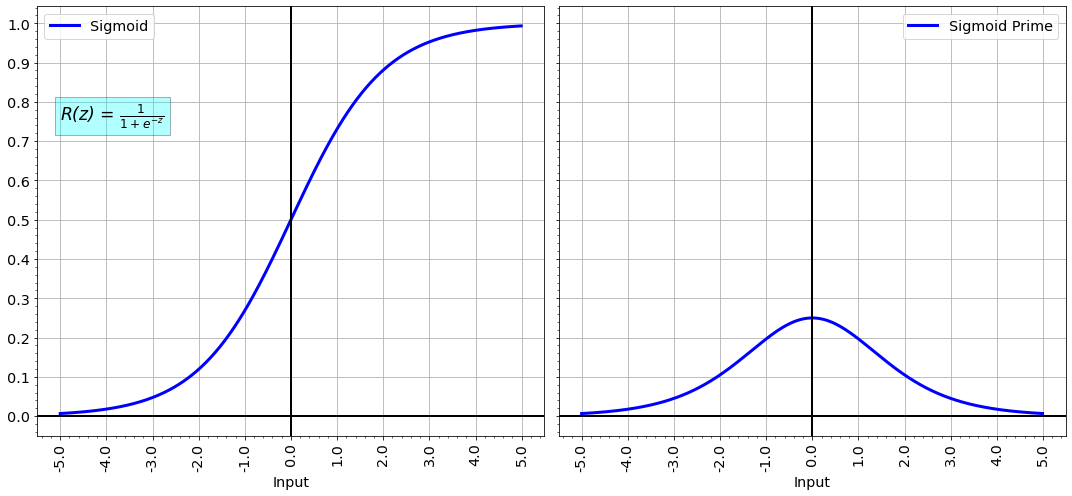

In [9]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * ( 1 - sigmoid(z))


col1 = 'Sigmoid'
col2 = 'Sigmoid Prime'

# add two columns in the dataframe for function values and its prime
data_df[col1] = data_df['x'].apply(lambda x: sigmoid (x))
data_df[col2] = data_df['x'].apply(lambda x: sigmoid_prime (x))

# create figure and its axis objects
fig, axes = plt.subplots(1, 2, sharey=True)

# Select Major and Minor axis formatings
yMajorLocator = 0.1
yMinorLocator = 0.02
fn_plot_activation(axes, data_df, col1, col2, yMajorLocator, yMinorLocator)

# Define the equation
eq1 = r'R(z) = $\frac{1}{1 + e^{-z}}$'

ax = axes[0]
xLoc = -5
yLoc = 0.8

fn_plot_equation(ax, xLoc , yLoc, eq1)
plt.tight_layout()
plt.savefig(os.path.join(outDir, '{}.png'.format(col1.lower())))

## Tanh

$\tanh(z) =\dfrac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$

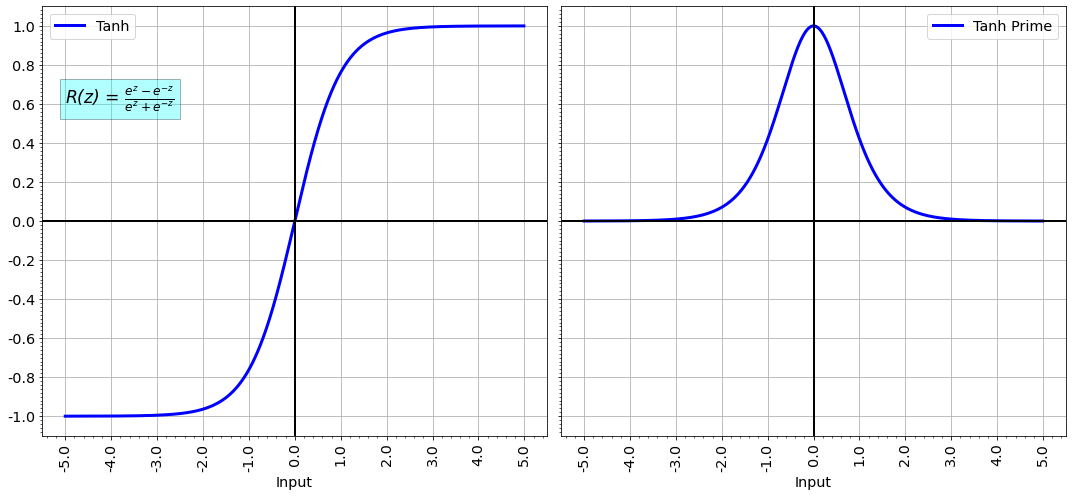

In [10]:
def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

def tanh_prime(z):
    return 1 - np.power(tanh(z), 2)

col1 = 'Tanh'
col2 = 'Tanh Prime'

data_df[col1] = data_df['x'].apply(lambda x: tanh (x))
data_df[col2] = data_df['x'].apply(lambda x: tanh_prime (x))

fig, axes = plt.subplots(1, 2, sharey=True)


yMajorLocator = 0.2
yMinorLocator = 0.02
fn_plot_activation(axes, data_df, col1, col2, yMajorLocator, yMinorLocator)


ax = axes[0]
eq1 = r'R(z) = $\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$'

xLoc = -5
yLoc = 0.7
fn_plot_equation(ax, xLoc , yLoc, eq1)

plt.tight_layout()
plt.savefig(os.path.join(outDir, '{}.png'.format(col1.lower())))

## Rectified Linear Units (ReLU)
$
\begin{align}
ReLU(z) = \left\{
\begin{array}{cl}
z & \text{for z} \gt 0\\
0  & \text{for z} \le 0.
\end{array}
\right.
\end{align}
$

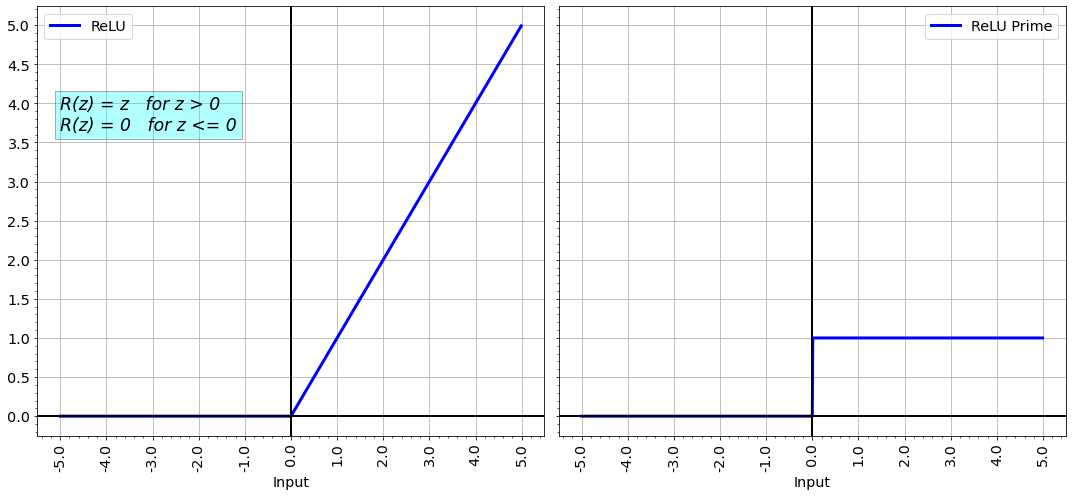

In [11]:
def relu(z):
    return max(0, z)

def relu_prime(z):
    return 1 if z > 0 else 0

col1 = 'ReLU'
col2 = 'ReLU Prime'

data_df[col1] = data_df['x'].apply(lambda x: relu (x))
data_df[col2] = data_df['x'].apply(lambda x: relu_prime (x ))

fig, axes = plt.subplots(1, 2, sharey=True)



yMajorLocator = 0.5
yMinorLocator = 0.1
fn_plot_activation(axes, data_df, col1, col2, yMajorLocator, yMinorLocator)

ax = axes[0]
eq1 = r'R(z) = z   for z > 0'
eq2 = r'R(z) = 0   for z <= 0'

eq = '{}\n{}'.format(eq1,eq2)

xLoc = -5
yLoc = 4.1

fn_plot_equation(ax, xLoc , yLoc, eq)

plt.tight_layout()
plt.savefig(os.path.join(outDir, '{}.png'.format(col1.lower())))

## LeakyReLU

$
\begin{align}
\text{LeakyReLU(z)} = \left\{
\begin{array}{cl}
z & \text{for z} \gt 0\\
\alpha \times z & \text{for z} \le 0.
\end{array}
\right.
\end{align}
$

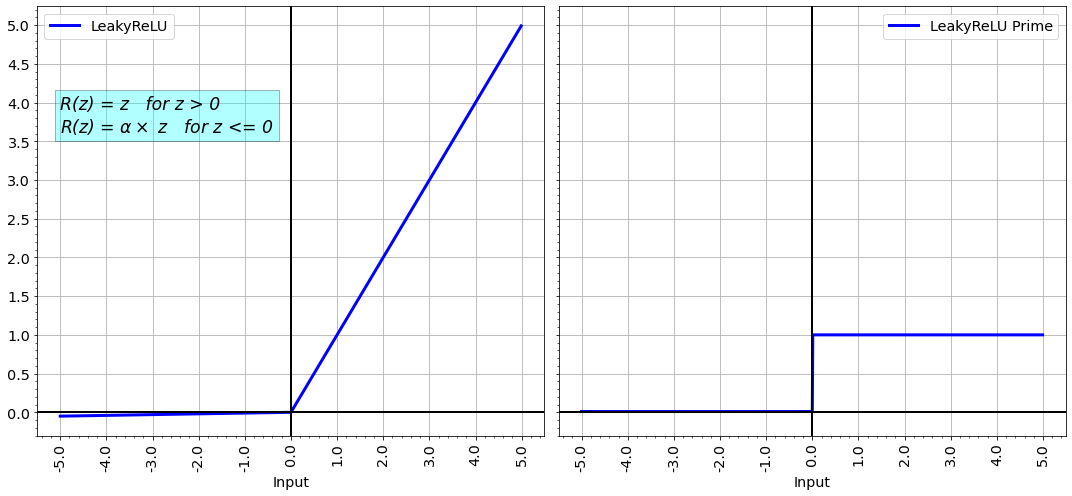

In [12]:
def leakyrelu(z, alpha):
    return max(alpha * z, z)

def leakyrelu_prime(z, alpha):
    return 1 if z > 0 else alpha

col1 = 'LeakyReLU'
col2 = 'LeakyReLU Prime'

alpha = 0.01 # 

data_df[col1] = data_df['x'].apply(lambda x: leakyrelu (x,alpha ))
data_df[col2] = data_df['x'].apply(lambda x: leakyrelu_prime (x,alpha ))

fig, axes = plt.subplots(1, 2, sharey=True)



yMajorLocator = 0.5
yMinorLocator = 0.1
fn_plot_activation(axes, data_df, col1, col2, yMajorLocator, yMinorLocator)


eq1 = r'R(z) = z   for z > 0'
eq2 = r'R(z) = $\alpha \times$ z   for z <= 0'

eq = '{}\n{}'.format(eq1,eq2)

ax = axes[0]
xLoc = -5
yLoc = 4.1
fn_plot_equation(ax, xLoc , yLoc, eq)

plt.tight_layout()
plt.savefig(os.path.join(outDir, '{}.png'.format(col1.lower())))

## Exponential Linear Unit (ELU)
$
\begin{align}
ELU(z) = \left\{
\begin{array}{cl}
z & \text{for z} \gt 0\\
\alpha \times (e^{z} - 1)  & \text{for z} \le 0.
\end{array}
\right.
\end{align}
$

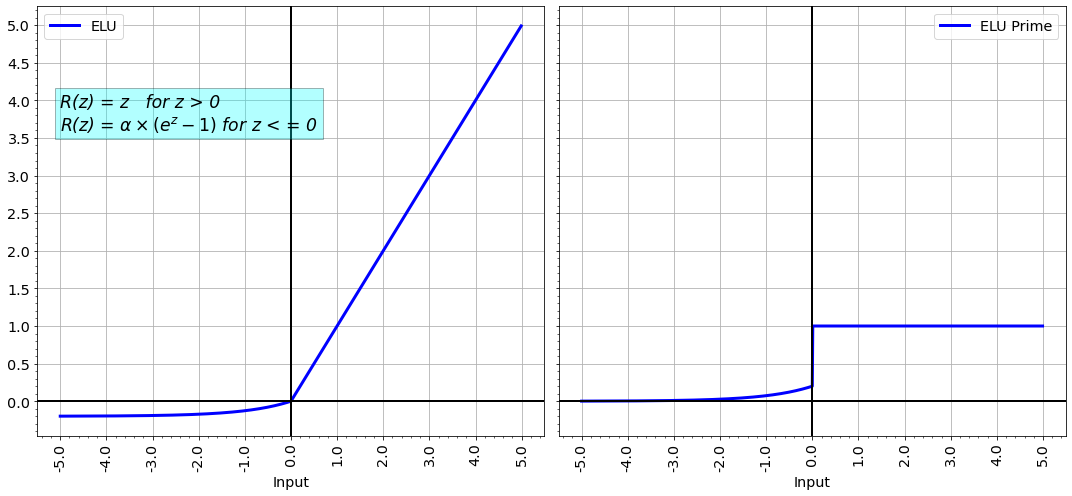

In [13]:
def elu(z,alpha):
    return z if z >= 0 else alpha*(np.exp(z) -1)

def elu_prime(z,alpha):
    return 1 if z > 0 else alpha*np.exp(z)

alpha = 0.2 # a common value is between 0.1 and 0.3.


col1 = 'ELU'
col2 = 'ELU Prime'

data_df[col1] = data_df['x'].apply(lambda x: elu (x,alpha ))
data_df[col2] = data_df['x'].apply(lambda x: elu_prime (x,alpha ))

fig, axes = plt.subplots(1, 2, sharey=True)


yMajorLocator = 0.5
yMinorLocator = 0.1
fn_plot_activation(axes, data_df, col1, col2, yMajorLocator, yMinorLocator)
ax =axes[0]

eq1 = r'R(z) = z   for z > 0'
eq2 = r'R(z) = $\alpha \times (e^{z} - 1)$ for z < = 0'

eq = '{}\n{}'.format(eq1,eq2)

xLoc = -5
yLoc = 4.1

fn_plot_equation(ax, xLoc , yLoc, eq)

plt.tight_layout()
plt.savefig(os.path.join(outDir, '{}.png'.format(col1.lower())))

## Scaled ELU (SELU)
SELU units, when used in conjunction with proper weight initialization and regularization techniques, encourage neuron activations to converge to zero-mean and unit variance without explicit use of e.g., batchnorm. For SELU units, the $\alpha$ and $\text{scale}$ values are constants chosen so that the mean and variance of the inputs are preserved between consecutive layers. As such the authors propose weights be initialized using Lecun-Normal initialization: 
$w_{ij} \sim
    \mathcal{N}(0, 1 / \text{fan_in})$,
    
and to use the dropout variant $`\alpha`$-dropout during regularization.  [*]_See the reference for more information (especially the appendix ;-) ).
    
### References
    .. [*] Klambauer, G., Unterthiner, T., & Hochreiter, S. (2017).
       "Self-normalizing neural networks." *Advances in Neural Information
       Processing Systems, 30.*
       
       
Evaluate the SELU activation on the elements of input `z`.
        
$
\begin{aligned}
\text{SELU}(z)  &=  \text{scale}  \text{ELU}(z, \alpha)\\
\end{aligned}
$

Which is simply

$
\begin{aligned}
\text{SELU}(z)  = \left\{
\begin{array}{cl}
\text{scale} \times z & \text{for z} \gt 0\\
\text{scale} \times \alpha \times (e^{z} - 1)  & \text{for z} \le 0.
\end{array}
\right.
\end{aligned}
$


The first derivative of the SELU activation on the elements of input `z`.

$
\begin{aligned}
\frac{\partial \text{SELU}}{\partial x_i} = \left\{
\begin{array}{cl}
\text{scale} \ \ \ \ &&& \text{for z} \gt 0\\
\text{scale} \times \alpha \times e^{x_i} \ \ \ \ &&&\text{for z} \le 0.
\end{array}
\right.
\end{aligned}
$

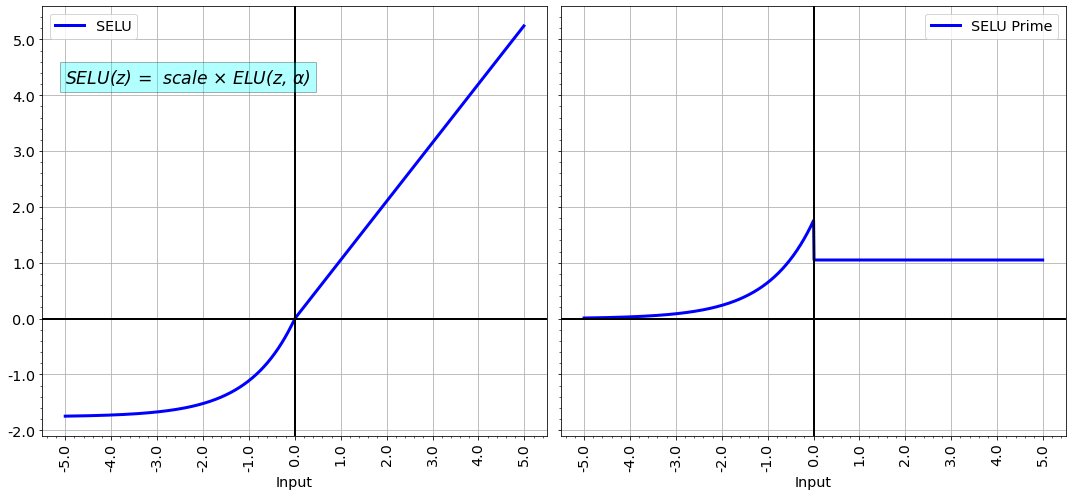

In [14]:
# Alpha and scales as per tensorflow documentations
alpha=1.67326324 
scale=1.05070098

def fn_elu(z, alpha = alpha):
    return z if z >= 0 else alpha*(np.exp(z) -1)

def fn_elu_prime(z,alpha):
    return 1 if z > 0 else alpha*np.exp(z)


def selu(z, scale = scale):

    return scale * fn_elu(z)

def selu_prime(x, scale = scale, alpha = alpha):
    return np.where(x >= 0, 
                    np.ones_like(x) * scale, 
                    np.exp(x) * alpha * scale)

col1 = 'SELU'
col2 = 'SELU Prime'

data_df[col1] = data_df['x'].apply(lambda x: selu (x))
data_df[col2] = data_df['x'].apply(lambda x: selu_prime (x))

fig, axes = plt.subplots(1, 2, sharey=True)

fn_plot_activation(axes, data_df, col1, col2)

eq1 = r'SELU(z) =  scale $\times$ ELU(z, $\alpha$)'

ax = axes[0]

xLoc = -5
yLoc = 4.5
fn_plot_equation(ax, xLoc , yLoc, eq1)

plt.tight_layout()
plt.savefig(os.path.join(outDir, '{}.png'.format(col1.lower())))

## Swish Activation Function

The Swish function is defines as 

swish(z) = z * sigmoid(z)

**Note:** we will be using sigmoid function defined above

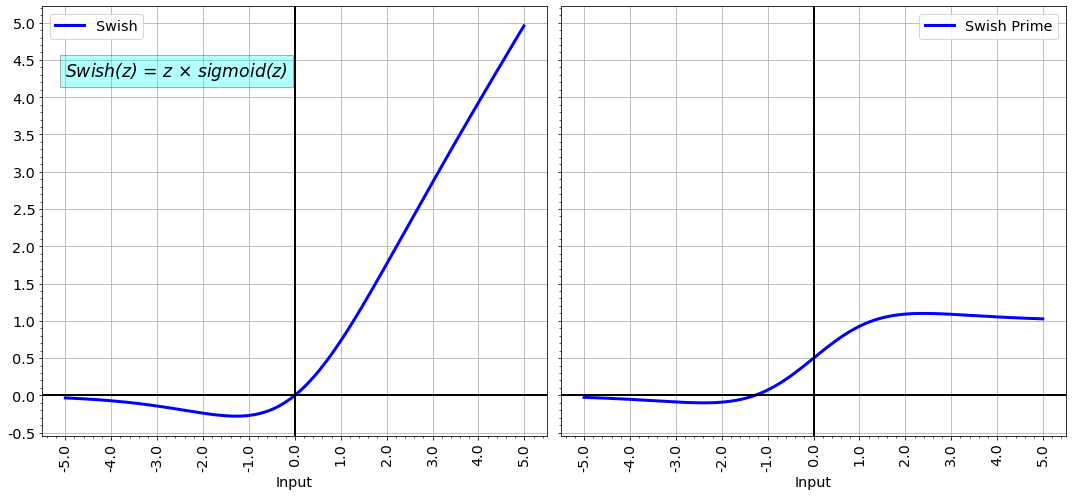

In [15]:
def swish(z):
    return z * sigmoid(z)

def swish_prime(x):
    return derivative(swish, z, dx=1e-6)

col1 = 'Swish'
col2 = 'Swish Prime'

data_df[col1] = data_df['x'].apply(lambda x: swish (x))
data_df[col2] = data_df['x'].apply(lambda x: swish_prime (x))

fig, axes = plt.subplots(1, 2, sharey=True)

yMajorLocator = 0.5
yMinorLocator = 0.1
fn_plot_activation(axes, data_df, col1, col2, yMajorLocator, yMinorLocator)

ax = axes[0]
eq1 = r'Swish(z) = z $\times$ sigmoid(z)'

xLoc = -5
yLoc = 4.5
fn_plot_equation(ax, xLoc , yLoc, eq1)

plt.tight_layout()
plt.savefig(os.path.join(outDir, '{}.png'.format(col1.lower())))

## LiSHT

The activation function in neural network is one of the important aspects which facilitates the deep training by introducing the non-linearity into the learning process. However, because of zero-hard rectification, some the of existing activations function such as ReLU and Swish miss to utilize the negative input values and may suffer from the dying gradient problem. Thus, it is important to look for a better activation function which is free from such problems. As a remedy, this paper proposes a new non-parametric function, called Linearly Scaled Hyperbolic Tangent (LiSHT) for Neural Networks (NNs). The proposed LiSHT activation function is an attempt to scale the non-linear Hyperbolic Tangent (Tanh) function by a linear function and tackle the dying gradient problem.

$LiSHT(z) = x \times Tanh(z)$

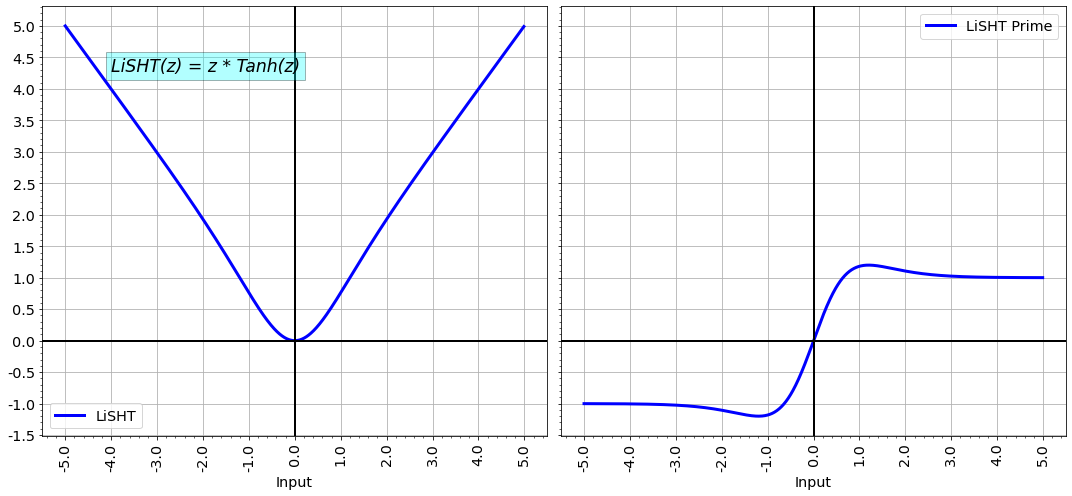

In [16]:
def lisht(z):
    return z * np.tanh(z)


def lisht_prime(z):
    return derivative(lisht, z, dx=1e-6)


col1 = 'LiSHT'
col2 = 'LiSHT Prime'


data_df[col1] = data_df['x'].apply(lambda x: lisht (x))

data_df[col2] = data_df['x'].apply(lambda x: lisht_prime (x))

fig, axes = plt.subplots(1, 2, sharey=True)



yMajorLocator = 0.5
yMinorLocator = 0.1
fn_plot_activation(axes, data_df, col1, col2, yMajorLocator, yMinorLocator)

eq1 = r'LiSHT(z) = z * Tanh(z)'


ax = axes[0]

xLoc = -4.0
yLoc = 4.5
fn_plot_equation(ax, xLoc , yLoc, eq1)

plt.tight_layout()
plt.savefig(os.path.join(outDir, '{}.png'.format(col1.lower())))

## Mish Activation Function
$
\begin{align}
mish(z) &= x * tanh(softplus(z))\\
& = z * tanh(ln(1 + e^{z}))\\
\end{align}
$

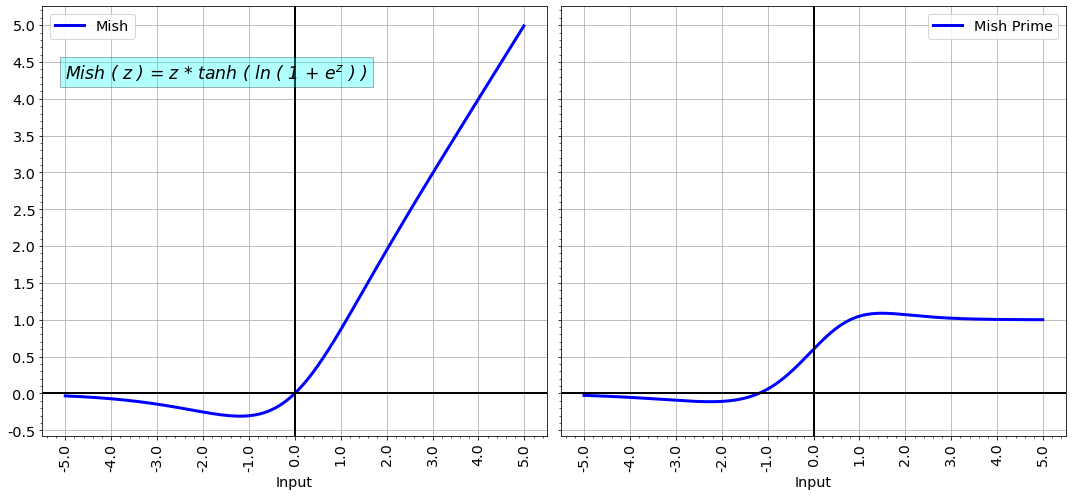

In [17]:
def mish(x):
    return x * np.tanh(np.log(1 + np.exp(x)))


def mish_prime(x):
    return derivative(mish, x, dx=1e-6)


col1 = 'Mish'
col2 = 'Mish Prime'

data_df[col1] = data_df['x'].apply(lambda x: mish (x))

data_df[col2] = data_df['x'].apply(lambda x: mish_prime (x))

fig, axes = plt.subplots(1, 2, sharey=True)



yMajorLocator = 0.5
yMinorLocator = 0.1
fn_plot_activation(axes, data_df, col1, col2, yMajorLocator, yMinorLocator)

eq1 = r'Mish ( z ) = z * tanh ( ln ( 1 + $e^{z}$ ) )'


ax = axes[0]

xLoc = -5
yLoc = 4.5
fn_plot_equation(ax, xLoc , yLoc, eq1)

plt.tight_layout()
plt.savefig(os.path.join(outDir, '{}.png'.format(col1.lower())))